**Problem 1**. Let $f(x) = \sqrt{x}$ for all $x \in [0,1]$.

**(a)** Create a MATLAB/Python program the gives the Lagrange interpolation of f on the nodes $x_i = \frac{1}{m}$ for $i =  0, 1, ..., m$. Plot the interpolation for $m = 200$. Make sure to use more points in the graph of the polynomial than the graph of $f$ . Make an observation based from the resulting figures





In [ ]:
#Lagrange Basis Function

def Lagrange_Basis(x, i, x_fx):
  n = len(x_fx)
  L = 1.0
  for j in range(n):
    if j != i:
      L = L*(x - x_fx[j])/(x_fx[i] - x_fx[j])

  return L

#Lagrange Interpolaion Function

def Interp_Lagrange(x, x_fx, y_fx):
  n = len(x_fx)                         #len(x_fx), or len(y_fx) can be use as a value for n
  fx_interpolated = 0.0

  for i in range(n):
    fx_interpolated = fx_interpolated + y_fx[i]*Lagrange_Basis(x, i, x_fx)

  return fx_interpolated

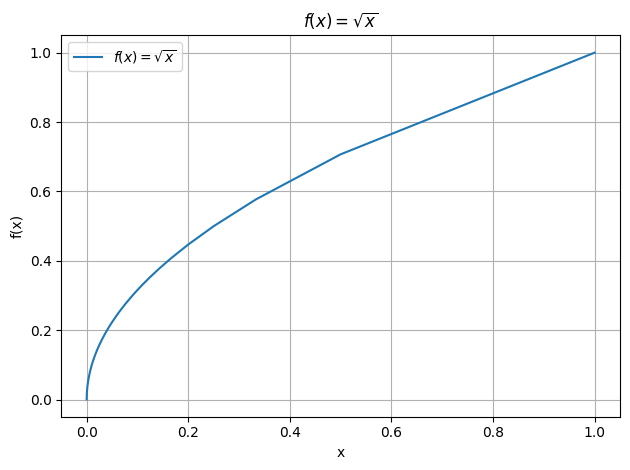

In [ ]:
#Plotting the function
import numpy as np
import matplotlib.pyplot as plt

m = 1000000
x_given = np.array([1/m for m in range(1, m+1)])
y_given = np.sqrt(x_given)

plt.plot(x_given, y_given, label = r"$f(x) = \sqrt{x}$")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r"$f(x) = \sqrt{x}$", fontsize = 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

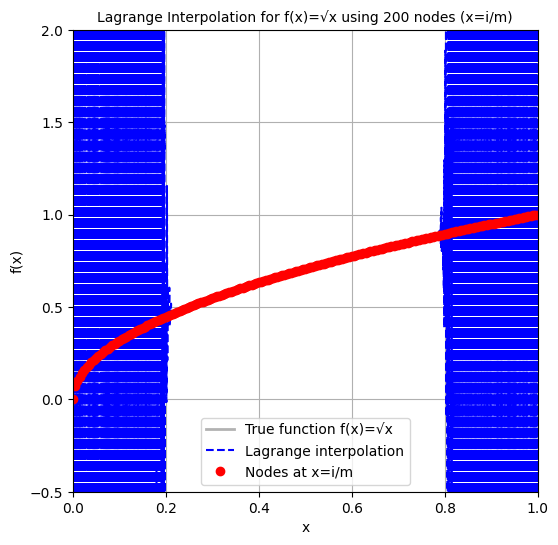

In [ ]:
#Using Lagrange Interpolation
m = 200  # number of nodes
x_nodes = np.array([i/m for i in range(m+1)])  #ascending order
y_nodes = np.sqrt(x_nodes)

# Points for evaluating the interpolation
x_eval = np.linspace(x_nodes[0], x_nodes[-1], 4000)
y_true = np.sqrt(x_eval)
y_interp = np.zeros_like(x_eval)

# Perform interpolation
for k in range(len(x_eval)):
    y_interp[k] = Interp_Lagrange(x_eval[k], x_nodes, y_nodes)

plt.figure(figsize=(6,6))
plt.plot(x_eval, y_true, color='black', linewidth=2, alpha=0.3, label='True function f(x)=√x')
plt.plot(x_eval, y_interp, 'b--', label='Lagrange interpolation')
plt.plot(x_nodes, y_nodes, 'ro', label='Nodes at x=i/m')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.title(f'Lagrange Interpolation for f(x)=√x using {m} nodes (x=i/m)', fontsize = 10)
plt.legend()
plt.grid(True)
plt.show()

**(b) BONUS:** Let $p_m(x)$ = be the Lagrange interpolation of $f$ using the nodes in (a). Let $\gamma = \frac{2m - 1}{2m}$, prove that $p_m(\gamma)$ does not converge to $f(\gamma)$ as $n ⟶ ∞$

**Solution to part (b)** By using the Lagrange Interpolation Error

$$
f(x) - p_m(x) = \frac{f^{(n+1)}(\zeta)}{(n+1)!}\Pi_{i = 0}^n (x - t_i)
$$

We set $x = \gamma = \frac{2m - 1}{2m}$ and to get

$$
f(\gamma) - p_m(\gamma) = \frac{f^{(n+1)}(\zeta)}{(n+1)!}\Pi_{i = 0}^n \left( \frac{2m - 1}{2m} - t_i\right)
$$

Since $t_i = i/m, i = 1, 2, ..., m$

$$
f(\gamma) - p_m(\gamma) = \frac{f^{(m+1)}(\zeta)}{(n+1)!}\Pi_{i = 0}^m \left( \frac{2m - 1}{2m} - \frac{i}{m}\right)
$$

or

$$
f(\gamma) - p_m(\gamma) = \frac{1}{(m+1)!}\frac{f^{(m+1)}(\zeta)}{(2m)^{m+1}}\Pi_{i = 0}^m \left(2(m - i) - 1\right)
$$

or

$$
f(\gamma) - p_m(\gamma) = \frac{1}{(m+1)!}\frac{f^{(m+1)}(\zeta)}{(2m)^{m+1}}\left(\frac{-(2m)!}{2^m m!}\right)
$$

On the other hand,
$$f^{(m+1)}(\zeta) = \left.\frac{d^{m+1} \sqrt{x}}{d x}\right|_{x = \zeta}  $$


Note that
$$
\frac{d^n}{dx^n} x^k
= \frac{\Gamma(k+1)}{\Gamma(k-n+1)} \, x^{k-n},
$$
Then we have
$$
f^{(m+1)}(\zeta)
= \left. \frac{d^{\,m+1}}{dx^{\,m+1}} x^{1/2} \right|_{x=\zeta}
= \frac{\Gamma(3/2)}{\Gamma\!\left(\tfrac12 - m\right)}
  \, \zeta^{\,\frac12 - (m+1)}
= \frac{\sqrt{\pi}}{2\Gamma\!\left(\tfrac12 - m\right)}
  \, \zeta^{-(m+\tfrac12)}.
$$

Therefore,


$$
f(\gamma) - p_m(\gamma) = \frac{1}{(m+1)!}\frac{1}{(2m)^{m+1}} \frac{\sqrt{\pi}}{2\Gamma\!\left(\tfrac12 - m\right)}
  \, \zeta^{-(m+\tfrac12)}\left(\frac{-(2m)!}{2^m m!}\right)
$$


We let

$$
G =
\frac{1}{(m+1)!}\,
\frac{1}{(2m)^{m+1}}\,
\frac{\sqrt{\pi}}{2}\,
\zeta^{-(m+\tfrac12)}\,
\left( -\,\frac{(2m)!}{2^m m!} \right)
$$
Then we have

$$
f(\gamma) - p_m(\gamma) = \frac{G}{\Gamma\!\left(\tfrac12 - m\right)}
$$

We observe the plot of $f(m) = \frac{1}{\Gamma(\frac{1}{2}-m)}$

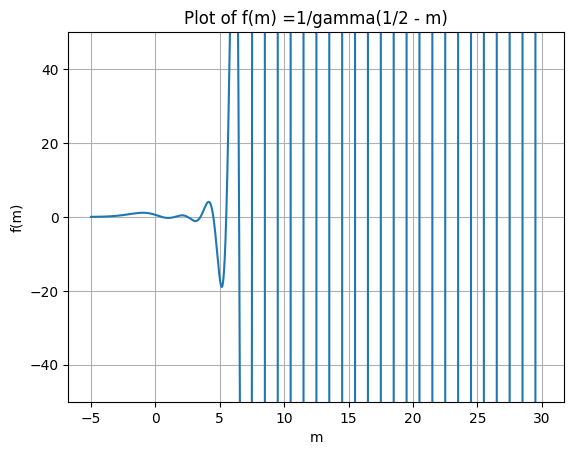

In [ ]:
##Observing the plot of f(x) = 1/Gamma(1/2 - x)
from scipy.special import gamma

#x values
xmin, xmax = -5, 30
N = 4000
x = np.linspace(xmin, xmax, N)

#Generate y = 1/gamma(1/2 - x) values
y = 1/gamma(0.5 - x)
ymin, ymax = -50, 50

#replacing infinite values with nan
y[np.isinf(y)] = np.nan

plt.plot(x, y)
plt.title("Plot of f(m) =1/gamma(1/2 - m)")
plt.xlabel("m")
plt.ylabel("f(m)")
plt.grid(True)
plt.ylim(ymin, ymax)
plt.show()

To be continued....

**(c)** Do the same in (a) but this time use Chebyshev nodes. Compare the obtained interpolation using the nodes in (a) and the interpolation using Chebyshev nodes

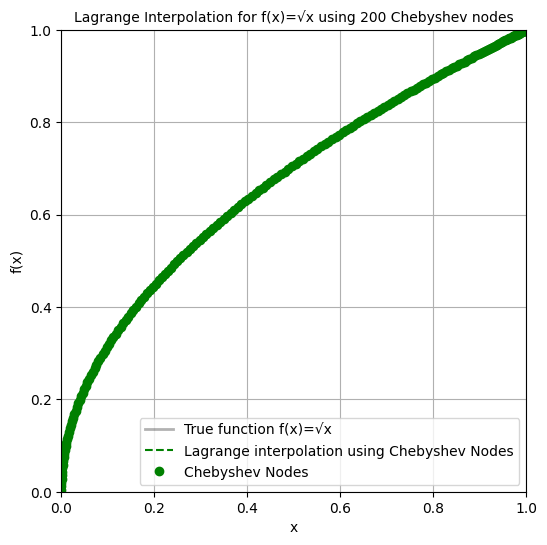

In [ ]:
# Generate Chebyshev nodes on [-1, 1]
n = m
x_chebyshev = np.cos(((2 * np.arange(1, n + 1) - 1) * np.pi) / (2 * n))

# Map Chebyshev nodes to [0, 1]
x_chebynodes = (1 + x_chebyshev)/2
y_chebynodes = np.sqrt(x_chebynodes)

# Points for evaluating the interpolation
x_eval = np.linspace(x_nodes[0], x_nodes[-1], 4000)
y_true = np.sqrt(x_eval)
y_interpchev = np.zeros_like(x_eval)

# Performing interpolation
y_interpchev = Interp_Lagrange(x_eval, x_chebynodes, y_chebynodes)

plt.figure(figsize=(6,6))
plt.plot(x_eval, y_true, color='black', linewidth=2, alpha=0.3, label='True function f(x)=√x')
plt.plot(x_eval, y_interpchev, 'g--', label='Lagrange interpolation using Chebyshev Nodes')
plt.plot(x_chebynodes, y_chebynodes, 'go', label='Chebyshev Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'Lagrange Interpolation for f(x)=√x using {n} Chebyshev nodes', fontsize = 10)
plt.legend()
plt.grid(True)
plt.show()

By putting the Lagrange Interpolation using Chebyshev Nodes and Lagrange Interpolation with nodes at $x_i = \frac{1}{m}$ for $i =  0, 1, ..., m$ in one plot

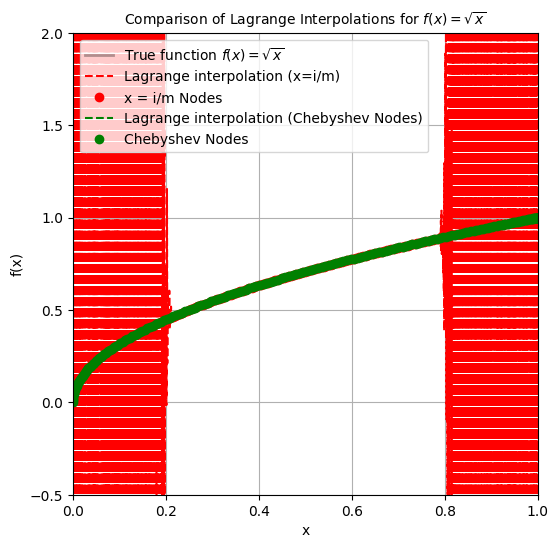

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x_eval, y_true, color='black', linewidth=2, alpha=0.3, label=r'True function $f(x)=\sqrt{x}$')
plt.plot(x_eval, y_interp, 'r--', label='Lagrange interpolation (x=i/m)')
plt.plot(x_nodes, y_nodes, 'ro', label='x = i/m Nodes')
plt.plot(x_eval, y_interpchev, 'g--', label='Lagrange interpolation (Chebyshev Nodes)')
plt.plot(x_chebynodes, y_chebynodes, 'go', label='Chebyshev Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.title(r'Comparison of Lagrange Interpolations for $f(x)=\sqrt{x}$', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

Based from the plot the error for the Lagrange interpolation (using  $x_i = \frac{1}{m}$ for $i =  0, 1, ..., m$ nodes) is very very large at the right and left hand side of the plot (The plot of lagrange interpolation polynomial for x = i/m nodes becomes very erratic at the points near the end points of $f(x) = \sqrt{x}$). As we increase the number of nodes, the error drastically increases near the left and right hand ends of $f(x) = \sqrt{x}$. On the other hand, the Lagrange interpolation using Chebyshev novedes shows no drastic deviation from the true function.

**Problem 2**. Let $f(x) =e^{\text{cos}(x)} + \text{sin}(6x) $ for all $x \in [-2\pi,2\pi]$.

**(a)** Write a MATLAB/Python progrram that gives trigonometric interpolation of $f$ on $[-2\pi,2\pi]$ using n equidistant nodes.



In [ ]:
def Interp_Trig(f, n, x_eval):
    a = -2*np.pi
    b = 2*np.pi
  # Generating equidistant interpolation points
    xk = np.linspace(a, b, n)
    fk = f(xk)

  # ComputingFFT coefficients for trigonometric interpolation
    gamma = np.fft.fft(fk)/n

  # Initializing interpolated values
    z_eval = np.real(gamma[0])*np.ones_like(x_eval)

  # Adding cosine and sine terms
    for k in range(1, (n+1) // 2):
        z_eval = z_eval + 2*( np.real(gamma[k]) * np.cos(k * (x_eval - a) * 2 * np.pi / (b - a))- np.imag(gamma[k])*np.sin(k*(x_eval - a)*2*np.pi/(b-a)) )

    return z_eval

**(b)** In one figure, plot $f$ and the trigonometric interpolation using 101 nodes

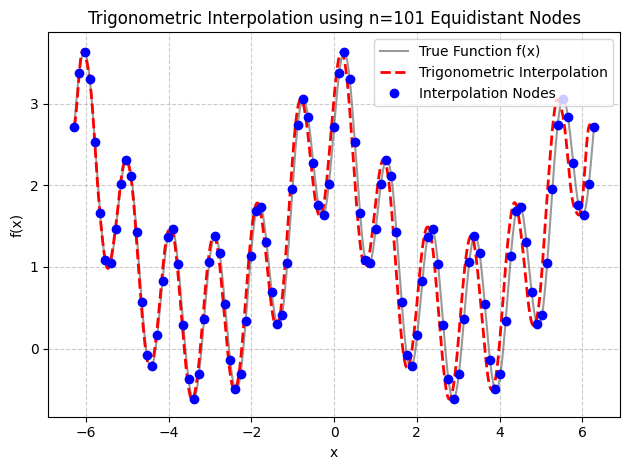

In [ ]:
# Define the function f(x)
def f(x):
    return np.exp(np.cos(x)) + np.sin(6 * x)

#Generating equidistant interpolation points(Trigonometric Nodes)
n = 101 #number of nodes
a = -2*np.pi
b = 2*np.pi
xk = np.linspace(a, b, n)
fk = f(xk)

#Evaluating at the function f(x)
x_eval = np.linspace(a, b, 1000)
zf = f(x_eval)

#Performing Interpolation Using the created Trig Interpolation function
z_triginterp = Interp_Trig(f, n, x_eval)

plt.plot(x_eval, zf, 'k-', alpha=0.4, label='True Function f(x)')
plt.plot(x_eval, z_triginterp, 'r--', linewidth=2, label='Trigonometric Interpolation')
plt.plot(xk, fk, 'bo', label='Interpolation Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Trigonometric Interpolation using n={n} Equidistant Nodes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.65)
plt.tight_layout()
plt.show()

**Problem 3** Consider the $L^2$ distance between the two polynomials $f$ and $g$ on $[-1,1]$, given by
$$
||f - g||_2 = \left(\int_{-1}^{1} (f(x) - g(x))^2 dx\right)^{\frac{1}{2}}
$$

which arise from the inner product $\langle f, g \rangle = \int_{-1}^{1} f(x) g(x) dx$. Let $\mathscr{P_n}$ be the vector space of the polynomials of degree no more than $n$, endowed with this inner product. Let $p_i (x), i = 1, 2, 3, ..., n $ be a basis of $\mathscr{P_n}$

**(a)** Suppose we wish to approximate a function $f$ with a degree $n$ polynomial $h(x) = \sum_{i = 0}^{n} \alpha_i p_i (x)$. To do so, we can find the polynomial $h \in \mathscr{P_n} $ that is the best least - squares fit for $f$ in the norm above. Write an optimization problem for finding $h$

**Solution for part(a)**: For a polynomial $h \in \mathscr{P_n} $, with $h(x) = \sum_{i = 0}^{n} \alpha_i p_i (x)$ we have


$$
||f - h||_2 = \left(\int_{-1}^{1} (f(x) - h(x))^2 dx\right)^{\frac{1}{2}}
$$

Substituting $\sum_{i = 0}^{n} \alpha_i p_i (x)$, we obtain


$$
||f - h||_2 = \left(\int_{-1}^{1} (f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x))^2 dx\right)^{\frac{1}{2}}
$$


Our goal now is to minimize $||f - h||_2 $ by determining a minimizing set of $\alpha_i$. Hence, we can let

$$J(\alpha_k) = \int_{-1}^{1} (f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x))^2 dx$$

for $k = 0, 1, 2, ..., n$.

Next we differentiate $J(\alpha_k)$ with respect to $\alpha_k$ and get


$$
\frac{d(J(\alpha_k))}{d\alpha_k} = \frac{d}{d\alpha_k} \left( \int_{-1}^{1} (f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x))^2 dx\right)
$$

Note that for $i = k$,
$$
\frac{d}{d\alpha_k} \left( \sum_{i = 0}^{n} \alpha_i p_i (x)\right)  = p_k(x)
$$
Otherwise,

$$
\frac{d}{d\alpha_k} \left( \sum_{i = 0}^{n} \alpha_i p_i (x)\right)  = 0
$$

Now,

$$
\frac{d(J(\alpha_k))}{d\alpha_k} = \int_{-1}^{1} 2(f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x)) (-p_k(x)) dx
$$

In order to minimize $J(\alpha_k)$, we can set $\frac{d(J(\alpha_k))}{d\alpha_k} = 0$ and get
$$
\int_{-1}^{1} 2(f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x)) p_k(x) dx = 0
$$
or
$$
\int_{-1}^{1} f(x)p_k(x)dx - \int_{-1}^{1}\sum_{i = 0}^{n} \alpha_i p_i (x) p_k(x) dx = 0
$$
or
$$
\int_{-1}^{1} f(x)p_k(x)dx = \sum_{i = 0}^{n} \left(\alpha_i\int_{-1}^{1} p_i (x) p_k(x)\right) dx
$$


But since $\langle f, g \rangle = \int_{-1}^{1} f(x) g(x) dx$  implies  $ \int_{-1}^{1} f(x) p_k(x) dx = \langle f(x), p_k(x) \rangle$ and $ \int_{-1}^{1} p_i(x)p_k(x) dx = \langle p_i(x), p_k(x) \rangle$, we have

$$
 \langle f(x), p_k(x) \rangle = \sum_{i = 0}^{n} \left(\alpha_i\langle p_i(x), p_k(x) \rangle  \right)
$$

If we expand the summation and run it through all values of $i$ and $k$, we see


$$
\langle f(x), p_1(x) \rangle = \alpha_1\langle p_1(x), p_1(x) \rangle  + \alpha_2\langle p_2(x), p_1(x) \rangle + \cdots + \alpha_1\langle p_n(x), p_1(x) \rangle
$$
$$
\langle f(x), p_2(x) \rangle = \alpha_1\langle p_1(x), p_2(x) \rangle  + \alpha_2\langle p_2(x), p_2(x) \rangle + \cdots + \alpha_1\langle p_n(x), p_2(x) \rangle
$$
$$
\vdots
$$
$$
\langle f(x), p_n(x) \rangle = \alpha_1\langle p_1(x), p_n(x) \rangle  + \alpha_2\langle p_2(x), p_n(x) \rangle + \cdots + \alpha_1\langle p_n(x), p_n(x) \rangle
$$

We can rewrite this to make the subscripts compatible to matrix entries as


$$
\langle f(x), p_1(x) \rangle = \alpha_1\langle p_1(x), p_1(x) \rangle  + \alpha_2\langle p_1(x), p_2(x) \rangle + \cdots + \alpha_1\langle p_1(x), p_n(x) \rangle
$$
$$
\langle f(x), p_2(x) \rangle = \alpha_1\langle p_2(x), p_1(x) \rangle  + \alpha_2\langle p_2(x), p_2(x) \rangle + \cdots + \alpha_1\langle p_2(x), p_n(x) \rangle
$$
$$
\vdots
$$
$$
\langle f(x), p_n(x) \rangle = \alpha_1\langle p_n(x), p_1(x) \rangle  + \alpha_2\langle p_n(x), p_2(x) \rangle + \cdots + \alpha_1\langle p_n(x), p_n(x) \rangle
$$

In matrix form,

$$
\begin{bmatrix}
\langle p_1(x), p_1(x) \rangle & \langle p_1(x), p_2(x) \rangle & \cdots & \langle p_1(x), p_n(x) \rangle \\
\langle p_2(x), p_1(x) \rangle & \langle p_2(x), p_2(x) \rangle & \cdots & \langle p_2(x), p_n(x) \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle p_n(x), p_1(x) \rangle & \langle p_n(x), p_2(x) \rangle & \cdots & \langle p_n(x), p_n(x) \rangle
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n
\end{bmatrix}
=
\begin{bmatrix}
\langle f(x), p_1(x) \rangle  \\
\langle f(x), p_2(x) \rangle  \\
\vdots \\
\langle f(x), p_n(x) \rangle
\end{bmatrix}
$$

Therefore, the vector

$$
\boldsymbol{\alpha}
=
\begin{bmatrix}
\alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n
\end{bmatrix}
$$

obtained from the above matrix equation is the optimizing set of $\alpha$ to the problem of minimizing

$$
||f - h||_2 = \left(\int_{-1}^{1} (f(x) - \sum_{i = 0}^{n} \alpha_i p_i (x))^2 dx\right)^{\frac{1}{2}}
$$

**(b)** Suppose we construct the Gram matrix G with entries $g_{ij} = \langle p_i, p_j \rangle$. How is  $G$ involved in solving (a)? What is the structure of $G$ when the basis functions are orthogonal with respect to the above inner product?

**Solution to part (b)** Because the entries of Gram matrix $G$ are $g_{ij} = \langle p_i, p_j \rangle$ we can therefore see that

$$
\boldsymbol{G} =
\begin{bmatrix}
\langle p_1(x), p_1(x) \rangle & \langle p_1(x), p_2(x) \rangle & \cdots & \langle p_1(x), p_n(x) \rangle \\
\langle p_2(x), p_1(x) \rangle & \langle p_2(x), p_2(x) \rangle & \cdots & \langle p_2(x), p_n(x) \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle p_n(x), p_1(x) \rangle & \langle p_n(x), p_2(x) \rangle & \cdots & \langle p_n(x), p_n(x) \rangle
\end{bmatrix}
$$

which means that

$$
\boldsymbol{\alpha}
=
\begin{bmatrix}
\alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n
\end{bmatrix}
=
\boldsymbol{G}^{-1}
\begin{bmatrix}
\langle f(x), p_1(x) \rangle  \\
\langle f(x), p_2(x) \rangle  \\
\vdots \\
\langle f(x), p_n(x) \rangle
\end{bmatrix}
$$

When the basis functions of $\boldsymbol{G}$ are orthogonal then  $g_{ij} = \langle p_i, p_j \rangle = 0$ for $i \ne j$. This means that all off diagonal entries of  $\boldsymbol{G}$ are zero. Hence, for orthogonal basis $p_i, p_j$ we have

$$
\boldsymbol{G} =
\begin{bmatrix}
\langle p_1(x), p_1(x) \rangle & 0 & \cdots & 0 \\
0 & \langle p_2(x), p_2(x) \rangle & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \langle p_n(x), p_n(x) \rangle
\end{bmatrix}
$$

Furthermore, with orthogonal basis $p_i$ and $p_j$ each $\alpha_i$ can now be easily solved as

$$
\alpha_i = \frac{\langle f(x), p_i(x) \rangle}{\langle p_i(x), p_i(x) \rangle}
$$
or
$$
\alpha_i = \frac{\int_{-1}^{1} f(x)p_i(x)dx}{\int_{-1}^{1} (p_i(x))^2dx}
$$

**(c)** Use the results in (a) and (b) to write a MATLAB/python program that calculates the degree 4 polynomial $h$ that bests approximate $f(x) = \sin(x)$ for $x \in [-1,1]$ with respect to the above norm. Use the MATLAB function $\texttt{integral}$ (or an equivalent python function) so solve the integration arising from the inner product. Plot $h(x)$ and $f(x)$, $x \in [-1,1]$ in one figure.

**Solution to part (c)** Since the minimization problem in part (a) is constructed in such a way that the weight function used is $w(x) = 1$, we seek an polynomials $p_i(x)$ and $p_j(x)$ such that

$$
\int_{-1}^{1}p_i(x)p_j(x)dx=
\begin{cases}
C \ne 0  & \text{,  } i = j \\
0 & \text{, } i \ne j
\end{cases}
$$

Fortunately, one such family of polynomials that satisfy this is the Legendre Polynomials and this family of polynomials is defined by the recursion

$$
\begin{cases}
p_0(x) = 1, \text{ }p_1(x) = x  \\
np_n(x) = (2n-1)xp_{n-1}(x) - (n-1)P_{n-2}(x) & \text{for } n \ge 2
\end{cases}
$$

Therefore, in the following code we will use Legendre Polynomials as basis

In [ ]:
import sympy as sp
x = sp.Symbol('x')

#Legendre Polynomial Basis function
def Legendre_Basis(n):
  #Base Case 1
  if n == 0:
    return sp.Integer(1)
  #Base Case 2
  elif n == 1:
    return x
  #Recursion part
  else:
    return sp.simplify((2*n - 1)*x*Legendre_Basis(n-1) - (n - 1)*Legendre_Basis(n - 2))/n  #This is in sympy format

In [ ]:
#integrtion in python can be done using scikitlearn.integrate.quad
from scipy.integrate import quad
n = 4   #max polynomial degree for the Legendre Polynomial Basis

#Given function from the problem
def f(x):
  return np.sin(x)

#coefficient function
def coeff_alpha_n(n):
  P_n_sp = Legendre_Basis(n)
  P_n_np = sp.lambdify(x, P_n_sp, 'numpy')

  numerator = quad(lambda x: f(x) * P_n_np(x), -1.0, 1.0, epsabs=1e-10, epsrel=1e-10)[0]
  denominator = quad(lambda x: P_n_np(x) * P_n_np(x), -1.0, 1.0,epsabs=1e-10, epsrel=1e-10)[0]

  alpha_n = numerator/denominator

  return alpha_n

#Generating the coefficient matrix (dimension: n x 1)
coeff = np.zeros(n+1)
for i in range(1,n+1):
  coeff[i] = coeff_alpha_n(i)

# Constructing approximation polynomial
Poly = 0
for i in range(n+1):
    Poly = Poly + coeff[i] * Legendre_Basis(i)

Poly_constructed_sp = sp.expand(Poly)
Poly_constructed_sp

-0.157615169549469*x**3 + 0.998075138548952*x

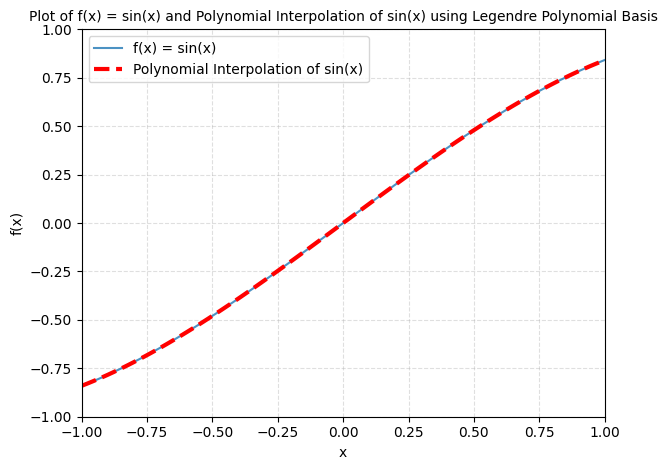

In [ ]:
#converting to numpy format
Poly_constructed_np = sp.lambdify(x, Poly_constructed_sp, 'numpy' )

x_eval = np.linspace(-1,1,100)
y_fx = f(x_eval)
y_interpolated = Poly_constructed_np(x_eval)

plt.plot(x_eval, y_fx, alpha = 0.8, label ='f(x) = sin(x)' )
plt.plot(x_eval, y_interpolated, 'r--', linewidth = 3, label = 'Polynomial Interpolation of sin(x)')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sin(x) and Polynomial Interpolation of sin(x) using Legendre Polynomial Basis', fontsize = 10)
plt.legend()
plt.grid(True, linestyle ='--',  alpha = 0.4)
plt.tight_layout()
plt.show()

Suppose we dont use orthogonal polynomial basis, and we use the following polynomial set as our basis:
$$
p(x) = \{ 1, x, x^2, x^3, x^4\}
$$
Then we proceed with the following steps:
1. Generate the Gram Matrix, $\boldsymbol{G}$
2. Generate the matrix $\boldsymbol{b}$ with $b_i = \langle f,p_i \rangle$
3. Determine the coefficient matrix using $\boldsymbol{\alpha}$ = $\boldsymbol{G^{-1}b}$
4. Construct the interpolated polynomial using the entries of coefficient matrix obtained in step 3

In [ ]:
#STEP 1: Generate the Gram Matrix

#Generating the polynomial array
poly_object = np.zeros(n+1, dtype = 'object')
for i in range(n+1):
  poly_object[i] = x**i

#Converting the sympy objects to numpy compatible objects
poly_np = [sp.lambdify(x,element, 'numpy') for element in poly_object]

#Generating the Gram Matrix
def Gram_ij(n):
  Gram_Matrix = np.zeros((n+1,n+1))
  for i in range(n+1):
    for j in range(n+1):
      Gram_Matrix[i][j] = quad(lambda x: poly_np[i](x) * poly_np[j](x), -1, 1)[0]

  return Gram_Matrix

G = Gram_ij(4)
print(G)


[[2.         0.         0.66666667 0.         0.4       ]
 [0.         0.66666667 0.         0.4        0.        ]
 [0.66666667 0.         0.4        0.         0.28571429]
 [0.         0.4        0.         0.28571429 0.        ]
 [0.4        0.         0.28571429 0.         0.22222222]]


In [ ]:
#STEP 2: Generating the b Matrix
#Generating the Gram Matrix
# Define b_Mat
def b_Mat(n):
    b_Matrix = np.zeros(n+1)
    for i in range(n+1):
        b_Matrix[i] = quad(lambda x: f(x) * poly_np[i](x),-1, 1,)[0]
    return b_Matrix


b = b_Mat(4)
print(b)

[0.         0.60233736 0.         0.35419715 0.        ]


In [ ]:
#STEP 3: Solving the Coefficient Matrix
Coeff_Matrix = np.linalg.solve(G,b)
print(Coeff_Matrix)

[ 0.          0.99807514  0.         -0.15761517  0.        ]


In [ ]:
#STEP 4: Construct the polynomial interpolation
# Constructing approximation polynomial
Poly_interp = sp.Integer(0)
for i in range(n+1):
    Poly_interp =  Poly_interp + Coeff_Matrix[i] * x**i

Poly_interpolation = sp.expand(Poly_interp)
Poly_interpolation

-0.157615169549471*x**3 + 0.998075138548953*x

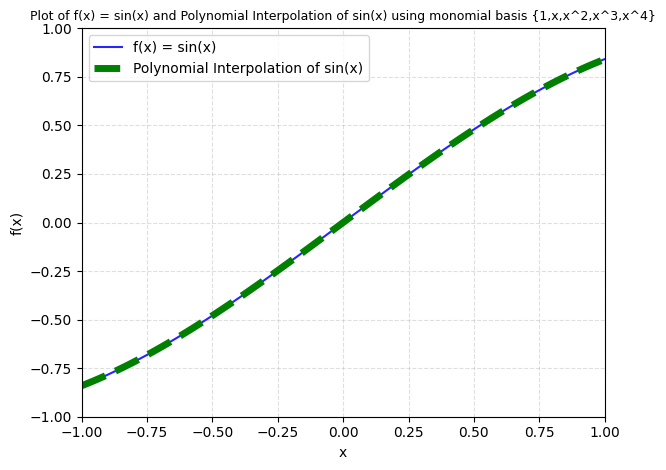

In [ ]:
#Plotting results of polynomial interpolation of f(x) = sin(x) using monomial basis {1, x, x^2, x^3, x^4}
x_eval = np.linspace(-1,1,100)
y_fx = f(x_eval)

#Converting to numpy compatible object
Poly_interp_np = sp.lambdify(x, Poly_interpolation, 'numpy')

y_interpolatedv2 = Poly_interp_np(x_eval)

plt.plot(x_eval, y_fx, 'b-' ,alpha = 0.85, label ='f(x) = sin(x)' )
plt.plot(x_eval, y_interpolatedv2, 'g--', linewidth =5, label = 'Polynomial Interpolation of sin(x)')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sin(x) and Polynomial Interpolation of sin(x) using monomial basis {1,x,x^2,x^3,x^4}', fontsize = 9)
plt.legend()
plt.grid(True, linestyle ='--',  alpha = 0.4)
plt.tight_layout()
plt.show()

**Problem 4** Suppose of $P(t)$ is a polynomial of degree 5.

(a) Write a set of linear conditions on the coefficients of $P(t)$ such that $P(t)$ satisfies the following conditions for fixed values of $h_0, h_1, h_2, h_3, h_4$ and $h_5$:

$$
\begin{aligned}
P(0) &= h_0, & \quad P(\pi) &= h_1, \\
P'(0) &= h_2, & \quad P'(\pi) &= h_3, \\
P''(0) &= h_4, & \quad P''(\pi) &= h_5, \\
\end{aligned}
$$


In [ ]:
from sympy import symbols, Eq, diff, pi, init_printing, lambdify, solve
from IPython.display import display

init_printing(use_latex=True)  # This is to enable LaTeX-style in IPython.display.display

# Define symbols in sympy
x, a_0, a_1, a_2, a_3, a_4, a_5 = symbols('x a_0 a_1 a_2 a_3 a_4 a_5')
h_0, h_1, h_2, h_3, h_4, h_5 = symbols('h_0 h_1 h_2 h_3 h_4 h_5')

# Define polynomial and derivatives
P = a_0 + a_1*x + a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5
dP = diff(P, x)         #First derivative of P with respect to x
d2P = diff(dP, x)       #Second derivative of P with respect to x

# Equations from the given conditions
equations_set = [
    Eq(P.subs(x, 0), h_0),
    Eq(P.subs(x, pi), h_1),
    Eq(dP.subs(x, 0), h_2),
    Eq(dP.subs(x, pi), h_3),
    Eq(d2P.subs(x, 0), h_4),
    Eq(d2P.subs(x, pi), h_5)
]

# Display
for eq in equations_set:
    display(eq)


a₀ = h₀

             2       3       4       5        
a₀ + π⋅a₁ + π ⋅a₂ + π ⋅a₃ + π ⋅a₄ + π ⋅a₅ = h₁

a₁ = h₂

                 2         3         4        
a₁ + 2⋅π⋅a₂ + 3⋅π ⋅a₃ + 4⋅π ⋅a₄ + 5⋅π ⋅a₅ = h₃

2⋅a₂ = h₄

                    2          3        
2⋅a₂ + 6⋅π⋅a₃ + 12⋅π ⋅a₄ + 20⋅π ⋅a₅ = h₅

If we solve for the coefficients of $P(t)$

In [ ]:
constants = sp.solve(equations_set, [a_0, a_1, a_2, a_3, a_4, a_5])
display(constants)

⎧                                                                   2       2  ↪
⎪                    h₄      -20⋅h₀ + 20⋅h₁ - 12⋅π⋅h₂ - 8⋅π⋅h₃ - 3⋅π ⋅h₄ + π ⋅ ↪
⎨a₀: h₀, a₁: h₂, a₂: ──, a₃: ───────────────────────────────────────────────── ↪
⎪                    2                                 3                       ↪
⎩                                                   2⋅π                        ↪

↪                                                2         2                   ↪
↪ h₅      30⋅h₀ - 30⋅h₁ + 16⋅π⋅h₂ + 14⋅π⋅h₃ + 3⋅π ⋅h₄ - 2⋅π ⋅h₅      -12⋅h₀ +  ↪
↪ ──, a₄: ─────────────────────────────────────────────────────, a₅: ───────── ↪
↪                                    4                                         ↪
↪                                 2⋅π                                          ↪

↪                            2       2   ⎫
↪ 12⋅h₁ - 6⋅π⋅h₂ - 6⋅π⋅h₃ - π ⋅h₄ + π ⋅h₅⎪
↪ ───────────────────────────────────────⎬
↪                 5                      ⎪
↪              2

(b) Plot the resulting $P(t)$ on $[0, \pi]$ if $h_0 = 1, h_1 = -1, h_2 = 0, h_3 = 0, h_4 = -1 $ and $h_5 = 1$. In the same figure, plot the graph of $f(t) = \cos t$ for $t = \in [0,\pi]$.

In [ ]:
#Setting the values of of h_0, h_1, h_2, h_3, h_4, h_5:
h_0 = 1
h_1 = -1
h_2 = 0
h_3 = 0
h_4 = -1
h_5 = 1

#System of Equations from part (a)
equations_set = [
    Eq(P.subs(x, 0), h_0),
    Eq(P.subs(x, pi), h_1),
    Eq(dP.subs(x, 0), h_2),
    Eq(dP.subs(x, pi), h_3),
    Eq(d2P.subs(x, 0), h_4),
    Eq(d2P.subs(x, pi), h_5)
]

#Solving the constants in sympy can be done using sympy.solve
coeff = solve(equations_set, [a_0, a_1, a_2, a_3, a_4, a_5], dict = True)

# Extracting the values of constants from the dictionary and evaluating the constant values numerically as float
coeff_numeric = [float(v.evalf()) for v in coeff[0].values()]

print(coeff_numeric)


[1.0, 0.0, -0.5, -0.00841091629640844, 0.05467650853468563, -0.0069616292834411364]


In [ ]:
# Constructing P(t)
n = 5
t = symbols('t')
P_interp = sp.Integer(0)
for i in range(n+1):
    P_interp =  P_interp + coeff_numeric[i] * t**i

P_interpolation_sp = sp.expand(P_interp)
P_interpolation_sp

                       5                       4                        3      ↪
- 0.00696162928344114⋅t  + 0.0546765085346856⋅t  - 0.00841091629640844⋅t  - 0. ↪

↪    2      
↪ 5⋅t  + 1.0

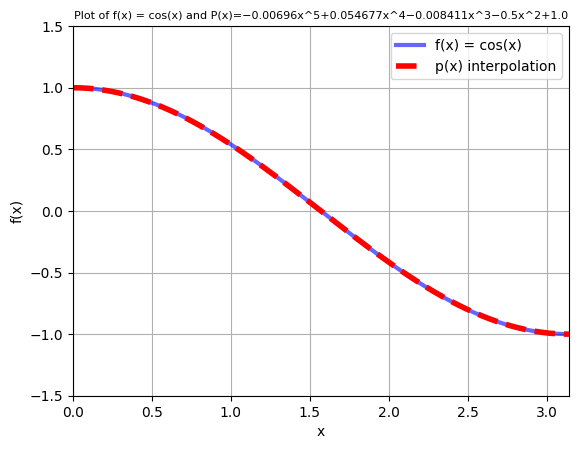

In [ ]:
#Converting to P_interpolation_sp to numpy compatible object
P_interpolation_np = sp.lambdify(t,P_interpolation_sp, 'numpy' )

x_val = np.linspace(0, np.pi, 200)
y_p_interp = P_interpolation_np(x_val)
y_cosx = np.cos(x_val)

plt.plot(x_val, y_cosx, 'b-', linewidth = 3, alpha = 0.6, label = 'f(x) = cos(x)')
plt.plot(x_val, y_p_interp, 'r--',linewidth = 4, label = 'p(x) interpolation')
plt.xlim(0, np.pi)
plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = cos(x) and P(x)=−0.00696x^5+0.054677x^4−0.008411x^3−0.5x^2+1.0', fontsize = 8)
plt.grid(True)
plt.legend()
plt.tight_layout
plt.show()


(c) Use $P(t)$ to approximate $\cos(2)$. Compute the absolute error

In [ ]:
#Computing P(2) using the polynomial P(t)
P_interpolation_np(2)

-0.4152353308864143

In [ ]:
#Computing cos(2)
np.cos(2)

np.float64(-0.4161468365471424)

In [ ]:
#Calculating absolute error
np.abs(P_interpolation_np(2) - np.cos(2))

np.float64(0.000911505660728118)

**Problem 5** Suppose $x_0 = 0, x_1 = 1, x_2 = 2, x_3 = 3, x_4 = 4$ and $x_5 = 5$ where $f_0 = 0, f_1 = 2, f_2 = 1, f_3 = 0, f_4 = 1$ and $f_5 = 4$

(a) Create a MATLAB/Python program that gives a natural cubic spline interpolation for $f$ with nodes $x_i, i = 0, 1, ... , 5$. Plot the resulting piecewise polynomial together witht the points $(x_i, f)$ . Use the MATLAB function $\texttt{scatter}$ or any equivalent python function to plot the points $(x_i, f)$





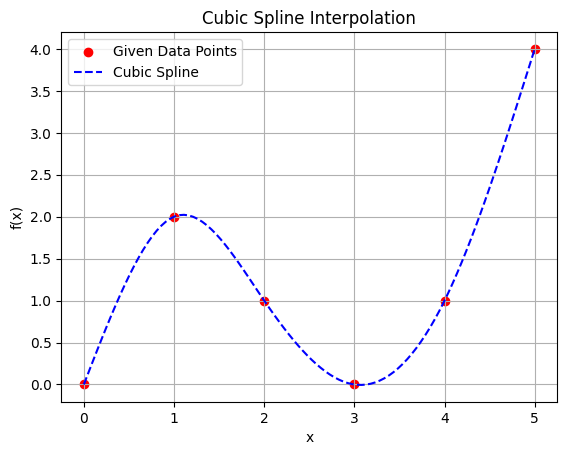

In [ ]:
#Data Points
x_given = [0, 1, 2, 3, 4, 5]
y_given = [0, 2, 1, 0, 1, 4]

x, a, b, c, d  = symbols('x a b c d')

#Number of Cubic polynomials used in Cubic spline interpolation
deg = 3                             #degree of a cubic polynomial
n = len(x_given)                    #Number of pairs of points
n_splines = n - 1                   #Number of spline functions for interpolation, n_vars = (deg + 1)*(n - 1) Number of variables

#Coefficients of splines
a = symbols(f'a1:{n}')    #[a1, a2, ..., a_(n-1)]
b = symbols(f'b1:{n}')    #[b1, b2, ..., b_(n-1)]
c = symbols(f'c1:{n}')    #[c1, c2, ..., c_(n-1)]
d = symbols(f'd1:{n}')    #[d1, d2, ..., d_(n-1)]

#Set of splines
P = [a[i]*x**3 + b[i]*x**2 +c[i]*x + d[i] for i in range(n_splines)]

#Initializing equations set
eqns_system = []


#Spline conditions at the points
for i in range(n_splines):
  eqns_system.append(Eq(P[i].subs(x, x_given[i]), y_given[i]))       #Splines evaluated at (x_i, y_i)
  eqns_system.append(Eq(P[i].subs(x, x_given[i+1]), y_given[i+1]))   #Splines evaluated at (x_(i+1), y_(i+1))

#First and Second Derivatives of P
dP = [diff(P_i, x) for P_i in P]
dP2 = [diff(dP_i, x) for dP_i in dP]

for i in range(n_splines - 1):
  eqns_system.append(Eq(dP[i].subs(x, x_given[i+1]), dP[i+1].subs(x, x_given[i+1])))      #Continuity condition at the points; f' is continuous
  eqns_system.append(Eq(dP2[i].subs(x, x_given[i+1]), dP2[i+1].subs(x, x_given[i+1])))    #Concavity condition at the points; f" is continuous

#Natural Cubic Spline Assumption: f"(x_0) = f"(x_n) = 0
eqns_system.append(Eq(dP2[0].subs(x, x_given[0]), 0))         #At the starting point of the first spline
eqns_system.append(Eq(dP2[-1].subs(x, x_given[-1]), 0))       #At the end point of the last spline

#Unknowns
coeffVars = list(a) + list(b) + list(c) + list(d)

#Solving the system of equations eqns_system using sp.solve
CoeffValues = solve(eqns_system, coeffVars, dict = True)[0]

P_splines = [sp.simplify(P_i.subs(CoeffValues)) for P_i in P]

#Building the piecewise function using the splines and their respective intervals
Piecewise_Splinef = sp.Piecewise(
    *[(P_splines[i], (x >= x_given[i]) & (x<=x_given[i+1])) for i in range(n_splines)]
)

f_spline_Interp = lambdify(x, Piecewise_Splinef, 'numpy')

#Generating points of the overall cubic spline interpolation function for plotting
x_eval = np.linspace(0, 5, 100)
y_cubic_spline = f_spline_Interp(x_eval)

plt.scatter(x_given, y_given, color = 'red', label ='Given Data Points')
plt.plot(x_eval, y_cubic_spline, 'b--', label ='Cubic Spline')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

(b) Use the natural cubic spline interpolation in (a) to approximate $f(4.5)$

In [ ]:
#Approximation at x = 4.5
f_spline_Interp(4.5)

array(2.34748804)

In [ ]:
#Using the CubicSpline from scipy.interpolate
from scipy.interpolate import CubicSpline

#Data Points
x_given = [0, 1, 2, 3, 4, 5]
y_given = [0, 2, 1, 0, 1, 4]

#Generating the Cubic Spline Polynomial
csp = CubicSpline(x_given, y_given, bc_type = 'natural')

#Approximation at x = 4.5
csp(4.5)

array(2.34748804)

**Problem 5.** Use De Casteljau Scheme to write your first name (*in cursive*) using appropriate Bezier points and curves. **BONUS:** Add a creative design

In [ ]:
#Bezier Points function using De Casteljau Scheme
def bez(x_coordinates, y_coordinates, t):
  # Stacking x and y into a single array of points
  P = np.column_stack((x_coordinates, y_coordinates))
  n = len(x_coordinates)

  for j in range(1, n):
    P = (1 - t) * P[:-1, :] + t * P[1:, :]

  # Final point(s)
  Bezier_points = P[0, :]
  return Bezier_points

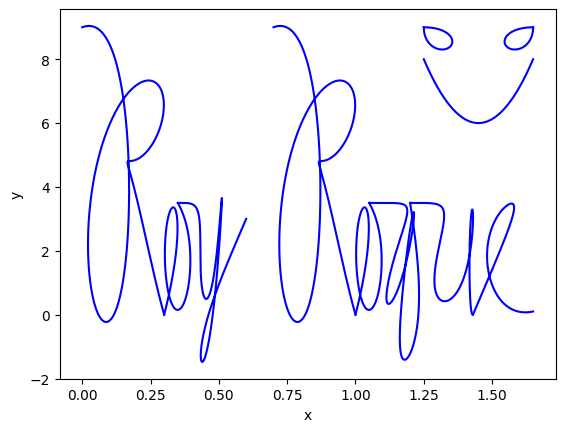

In [ ]:
# Control points for R
x_r = [0, 0.3 , 0.2 , 0.15 , 0,-0.5 , 0.1, 0.4, 0.7, 0.4, 0, 0.17, 0.1, 0.2, 0.3]
y_r = [9, 10  , -2  , -10  ,-2,  9  , 10 , 11 , 9  , 5  , 0, 5, 9, 3, 0]

# Parameter values
t_values = np.linspace(0, 1, 1000)

# Compute Bezier curve for R
r_curve = np.array([bez(x_r, y_r, t) for t in t_values])
xr_curve = r_curve[:, 0]
yr_curve = r_curve[:, 1]

#for i in range(len(x_r)):
   #plt.text(x_r[i], y_r[i], f'({x_r[i]}, {y_r[i]})', fontsize=10)


#Control Points for O
x_o = [0.3, 0.45 , 0.25 , 0.25, 0.3, 0.4, 0.45, 0.35]
y_o = [0  , 5    , 5    , 2   , -3 ,-0.5, 2   , 3.5 ]

# Compute Bezier curve for O
o_curve = np.array([bez(x_o, y_o, t) for t in t_values])
xo_curve = o_curve[:, 0]
yo_curve = o_curve[:, 1]


#Control Points for y
x_y = [0.35, 0.43, 0.45, 0.46, 0.4, 0.41, 0.42, 0.5, 0.5, 0.5, 0.52, 0.52, 0.53,0.52,  0.55, 0.45, 0.44, 0.44, 0.44, 0.4, 0.4, 0.45, 0.55, 0.6 ]
y_y = [3.5 , 3.5 , 3.5 , 3.5 , 0  , 0   , 0   , 0  , -2, 0.1, 3.5 , 11   , 11 ,0   ,  -1  , -2  , -2  , -2, -1.95, -1.9, -0.8, 0, 2, 3  ]

# Compute Bezier curve for O
y_curve = np.array([bez(x_y, y_y, t) for t in t_values])
xy_curve = y_curve[:, 0]
yy_curve = y_curve[:, 1]


#Control Points for R2
x_r2 = x_r
for i in range(len(x_r2)):
  x_r2[i] = x_r2[i] + 0.7         #Shifting the x - values of x_r 0.7 units to the right

y_r2 = [9, 10  , -2  , -10  ,-2,  9  , 10 , 11 , 9  , 5  , 0, 5, 9, 3, 0]
# Compute Bezier curve for R2
r2_curve = np.array([bez(x_r2, y_r2, t) for t in t_values])
xr2_curve = r2_curve[:, 0]
yr2_curve = r2_curve[:, 1]

#Control Points for O2
x_o2 = x_o
for i in range(len(x_o2)):
  x_o2[i] = x_o2[i] + 0.7         #Shifting the x - values of x_o by 0.7 units to the right
y_o2 = [0  , 5    , 5    , 2   , -3 ,-0.5, 2   , 3.5 ]

# Compute Bezier curve for O2
o2_curve = np.array([bez(x_o2, y_o2, t) for t in t_values])
xo2_curve = o2_curve[:, 0]
yo2_curve = o2_curve[:, 1]


#Control Points for Q
x_q = [1.05 , 1.18, 1.22 , 1.23 , 1.25, 1.1, 0.8, 1.18, 1.19, 1.2, 1.35, 1.2, 1.2, 1.2, 1.2, 1.18, 1, 1.22, 1.3, 1.2 ]
y_q = [3.5  , 3.5 , 3.5  , 3.5  , 3.5 ,   2, -3, -1.5, -1, 0.1, 5, 8, 3.5, 3, 2.5, -2, -3, -2, -2, 3.5 ]

# Compute Bezier curve for Q
q_curve = np.array([bez(x_q, y_q, t) for t in t_values])
xq_curve = q_curve[:, 0]
yq_curve = q_curve[:, 1]

#Control Points for U
x_u = [1.2 , 1.35, 1.36, 1.37, 1.25, 1.2, 1.25, 1.35,1.38, 1.4, 1.45, 1.45, 1.44, 1.43, 1.42, 1.4, 1.42, 1.43  ]
y_u = [3.5  , 3.5, 3.5, 3.5, 1, 0, 0, 0, 0, 0, 1, 3.5, 3.5, 3.5, 7, 0, 0, 0  ]

# Compute Bezier curve for U
u_curve = np.array([bez(x_u, y_u, t) for t in t_values])
xu_curve = u_curve[:, 0]
yu_curve = u_curve[:, 1]


#Control Points for E
x_e = [1.43 , 1.68, 1.6, 1.55, 1.4, 1.45, 1.48, 1.6, 1.65 ]
y_e = [0  , 5, 3.5, 3.5, 3.5, 1, 0, 0, 0.1  ]

# Compute Bezier curve for U
e_curve = np.array([bez(x_e, y_e, t) for t in t_values])
xe_curve = e_curve[:, 0]
ye_curve = e_curve[:, 1]


#Control Points for lefteye
x_eyeL = [1.25 , 1.4, 1.4, 1.25, 1.25]
y_eyeL = [9  , 9, 8, 8, 9]

# Compute Bezier curve for lefteye
eyeL_curve = np.array([bez(x_eyeL, y_eyeL, t) for t in t_values])
xeyeL_curve = eyeL_curve[:, 0]
yeyeL_curve = eyeL_curve[:, 1]


#Control Points for righteye
x_eyeR = [1.65 , 1.5, 1.5, 1.65, 1.65]
y_eyeR = [9  , 9, 8, 8, 9]

# Compute Bezier curve for righteye
eyeR_curve = np.array([bez(x_eyeR, y_eyeR, t) for t in t_values])
xeyeR_curve = eyeR_curve[:, 0]
yeyeR_curve = eyeR_curve[:, 1]


#Control Points for Smile
x_S = [1.25 , 1.45, 1.65]
y_S = [8  , 4, 8]

# Compute Bezier curve for righteye
S_curve = np.array([bez(x_S, y_S, t) for t in t_values])
xS_curve = S_curve[:, 0]
yS_curve = S_curve[:, 1]

plt.plot(xr_curve, yr_curve, 'b-')
plt.plot(xo_curve, yo_curve, 'b-')
plt.plot(xy_curve, yy_curve, 'b-')
plt.plot(xr2_curve, yr2_curve, 'b-')
plt.plot(xo2_curve, yo2_curve, 'b-')
plt.plot(xq_curve, yq_curve, 'b-')
plt.plot(xu_curve, yu_curve, 'b-')
plt.plot(xe_curve, ye_curve, 'b-')
plt.plot(xeyeL_curve, yeyeL_curve, 'b-')
plt.plot(xeyeR_curve, yeyeR_curve, 'b-')
plt.plot(xS_curve, yS_curve, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()